## Winter is Coming!
<p>Game of Thrones is the hugely popular television series by HBO based on the also hugely popular book series by George R.R. Martin. Using degree centrality, betweeness centrality and google pagerank we try to find out the evolution of importance for some specific characters, co-relation between all characters and the most important characters in the five books.</p>
<p><img src="https://i.imgur.com/vF5nUwz.png"></p>

In [1]:
# import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import math

In [14]:
# read in dataset of the game of thrones books
book = pd.read_csv("datasets/book1.csv")

# show the head of the dataset
display(book.head(10))

# create a graph object
G_book1 = nx.Graph()

# Iterating through the DataFrame to add edges
for _, edge in book.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
5,Aemon-Targaryen-(Maester-Aemon),Bowen-Marsh,Undirected,4,1
6,Aemon-Targaryen-(Maester-Aemon),Chett,Undirected,9,1
7,Aemon-Targaryen-(Maester-Aemon),Clydas,Undirected,5,1
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1


## The evolution of character importance
<p>Let's look at the evolution of characters using degree centrality, betweeness centrality and Google Pagerank of a couple of important characters over the five books.</p>

([<matplotlib.axis.XTick at 0x7f6a9a20c160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

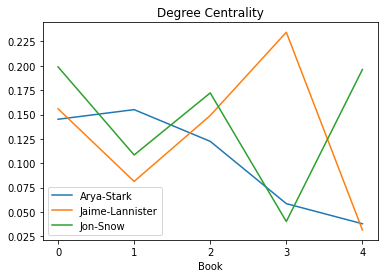

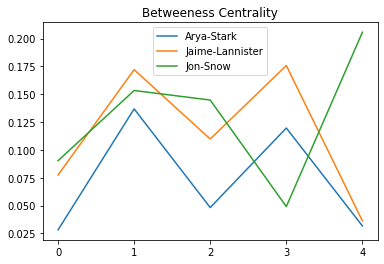

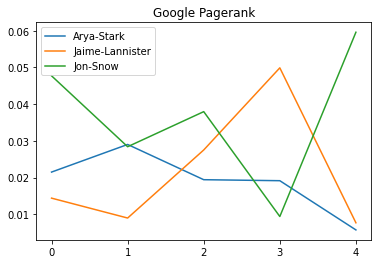

In [3]:
# Creating a list of degree centrality, betweeness centrality and google pagerank of all the books
degree = [nx.degree_centrality(book) for book in books]
betweeness = [nx.betweenness_centrality(book, weight='weight') for book in books]
google = [nx.pagerank(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities, betweeness centrality and google pagerank in all the books
degree_evolution = pd.DataFrame.from_records(degree)
betweeness_evolution = pd.DataFrame.from_records(betweeness)
pagerank_evolution = pd.DataFrame.from_records(google)

# set the explicit x axis values for the plot
x = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
minimum_ele = min(x)
maximum_ele = max(x)
new_list = range(math.floor(min(x)), math.ceil(max(x))+1)

# Plotting the values for Arya-Stark, Jaime-Lannister and Jon-Snow
degree_evolution [['Arya-Stark', 'Jaime-Lannister', 'Jon-Snow']].plot()
plt.title("Degree Centrality")
plt.xlabel("Book")
plt.xticks(new_list)

betweeness_evolution [['Arya-Stark', 'Jaime-Lannister', 'Jon-Snow']].plot()
plt.title("Betweeness Centrality")
plt.xticks(new_list)

pagerank_evolution [['Arya-Stark', 'Jaime-Lannister', 'Jon-Snow']].plot()
plt.title("Google Pagerank")
plt.xticks(new_list)

## Correlation between different characters
<p>Let's look at the correlation between characters using google pageRank, betweenness centrality and degree centrality for the five books using Pearson correlation.</p>

In [4]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in all the books
ranking_book1 = [nx.pagerank(books[0]), 
            nx.betweenness_centrality(books[0], weight='weight'), 
            nx.degree_centrality(books[0])]

ranking_book2 = [nx.pagerank(books[1]), 
            nx.betweenness_centrality(books[1], weight='weight'), 
            nx.degree_centrality(books[1])]

ranking_book3 = [nx.pagerank(books[2]), 
            nx.betweenness_centrality(books[2], weight='weight'), 
            nx.degree_centrality(books[2])]

ranking_book4 = [nx.pagerank(books[3]), 
            nx.betweenness_centrality(books[3], weight='weight'), 
            nx.degree_centrality(books[3])]

ranking_book5 = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
correlation_book1 = pd.DataFrame.from_records(ranking_book1)
correlation_book2 = pd.DataFrame.from_records(ranking_book2)
correlation_book3 = pd.DataFrame.from_records(ranking_book3)
correlation_book4 = pd.DataFrame.from_records(ranking_book4)
correlation_book5 = pd.DataFrame.from_records(ranking_book5)

# Calculate and show the correlation
display("Co-relation table of Book 1", correlation_book1.corr())
display("Co-relation table of Book 2", correlation_book2.corr())
display("Co-relation table of Book 3", correlation_book3.corr())
display("Co-relation table of Book 4", correlation_book4.corr())
display("Co-relation table of Book 5", correlation_book5.corr())

'Co-relation table of Book 1'

,Addam-Marbrand,Jaime-Lannister,Tywin-Lannister,Aegon-I-Targaryen,Daenerys-Targaryen,Eddard-Stark,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Bowen-Marsh,Chett,...,Lancel-Lannister,Leo-Lefford,Mace-Tyrell,Lyn-Corbray,Paxter-Redwyne,Maegor-I-Targaryen,Mord,Randyll-Tarly,Timett,Ulf-son-of-Umar
Addam-Marbrand,1.000000,0.842090,0.927793,0.999998,0.983248,0.865681,0.968012,0.846412,0.998436,0.992181,...,0.998524,0.997357,0.402951,0.997971,0.968833,0.998124,0.967320,0.996609,0.551722,0.991809
Jaime-Lannister,0.842090,1.000000,0.982509,0.843190,0.926290,0.998971,0.950475,0.999967,0.870924,0.902819,...,0.811551,0.800674,0.832934,0.806044,0.682244,0.807492,0.677819,0.794860,0.914421,0.766301
Tywin-Lannister,0.927793,0.982509,1.000000,0.928553,0.980256,0.989943,0.991726,0.983979,0.947199,0.967104,...,0.906158,0.898230,0.715320,0.902157,0.806456,0.903212,0.802872,0.893950,0.823055,0.872537
Aegon-I-Targaryen,0.999998,0.843190,0.928553,1.000000,0.983618,0.866701,0.968522,0.847497,0.998548,0.992434,...,0.998411,0.997206,0.404819,0.997839,0.968326,0.997997,0.966801,0.996439,0.553424,0.991546
Daenerys-Targaryen,0.983248,0.926290,0.980256,0.983618,1.000000,0.942424,0.997529,0.929298,0.991900,0.998309,...,0.971896,0.967404,0.563021,0.969648,0.907452,0.970245,0.904899,0.964917,0.694500,0.951912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maegor-I-Targaryen,0.998124,0.807492,0.903212,0.997997,0.970245,0.833410,0.950836,0.812223,0.993141,0.982679,...,0.999976,0.999934,0.346165,0.999997,0.982181,1.000000,0.981029,0.999777,0.499627,0.997768
Mord,0.967320,0.677819,0.802872,0.966801,0.904899,0.710461,0.872759,0.683725,0.951633,0.928111,...,0.979665,0.983188,0.157722,0.981501,0.999982,0.981029,1.000000,0.984903,0.322218,0.991784
Randyll-Tarly,0.996609,0.794860,0.893950,0.996439,0.964917,0.821558,0.944086,0.799727,0.990451,0.978548,...,0.999607,0.999954,0.326282,0.999826,0.985930,0.999777,0.984903,1.000000,0.481229,0.998955
Timett,0.551722,0.914421,0.823055,0.553424,0.694500,0.895126,0.743335,0.911128,0.597483,0.651501,...,0.505604,0.489660,0.985637,0.497502,0.327927,0.499627,0.322218,0.481229,1.000000,0.440670


'Co-relation table of Book 2'

,Aegon-I-Targaryen,Harren-Hoare,Nan,Rhaenys-Targaryen,Tyrion-Lannister,Visenya-Targaryen,Aegon-V-Targaryen,Aemon-Targaryen-(Maester-Aemon),Daeron-II-Targaryen,Jeor-Mormont,...,Olyvar-Frey,Palla,Perwyn-Frey,Qyburn,Steffon-Baratheon,Rickard-Karstark,Walder-Frey,Robett-Glover,Shadd,Werlag
Aegon-I-Targaryen,1.000000,0.275089,0.673687,0.199709,0.698821,0.225483,0.212627,0.996638,0.212627,0.940913,...,0.244472,0.797893,0.997665,0.244991,0.553998,0.259197,0.303219,0.320747,0.189318,0.283586
Harren-Hoare,0.275089,1.000000,0.895828,0.996989,0.879937,0.998687,0.997926,0.352934,0.997926,0.584418,...,0.999497,0.799034,0.208777,0.999514,0.952797,0.999864,0.999568,0.998856,0.996112,0.999961
Nan,0.673687,0.895828,1.000000,0.858671,0.999403,0.871890,0.865362,0.731971,0.865362,0.884148,...,0.881290,0.983009,0.621636,0.881543,0.988466,0.888378,0.908499,0.916054,0.853193,0.899726
Rhaenys-Targaryen,0.199709,0.996989,0.858671,1.000000,0.840448,0.999652,0.999913,0.279319,0.999913,0.519737,...,0.998946,0.750003,0.132315,0.998921,0.926386,0.998132,0.994280,0.992141,0.999944,0.996264
Tyrion-Lannister,0.698821,0.879937,0.999403,0.840448,1.000000,0.854448,0.847528,0.755077,0.847528,0.899764,...,0.864434,0.988765,0.648331,0.864703,0.982643,0.871983,0.893517,0.901649,0.834660,0.884107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rickard-Karstark,0.259197,0.999864,0.888378,0.998132,0.871983,0.999396,0.998852,0.337457,0.998852,0.570958,...,0.999884,0.789010,0.192622,0.999892,0.947661,1.000000,0.998948,0.997932,0.997429,0.999679
Walder-Frey,0.303219,0.999568,0.908499,0.994280,0.893517,0.996751,0.995603,0.380274,0.995603,0.608009,...,0.998134,0.816356,0.237422,0.998167,0.961307,0.998948,1.000000,0.999830,0.993093,0.999789
Robett-Glover,0.320747,0.998856,0.916054,0.992141,0.901649,0.995096,0.993706,0.397272,0.993706,0.622552,...,0.996838,0.826872,0.255303,0.996880,0.966225,0.997932,0.999830,1.000000,0.990759,0.999240
Shadd,0.189318,0.996112,0.853193,0.999944,0.834660,0.999317,0.999717,0.269132,0.999717,0.510657,...,0.998404,0.742954,0.121807,0.998374,0.922344,0.997429,0.993093,0.990759,1.000000,0.995293


'Co-relation table of Book 3'

,Addam-Marbrand,Gyles-Rosby,Jaime-Lannister,Jalabhar-Xho,Joffrey-Baratheon,Kevan-Lannister,Oberyn-Martell,Tyrion-Lannister,Varys,Aegon-Frey-(son-of-Stevron),...,Ragwyle,Ramsay-Snow,Rollam-Westerling,Rhaella-Targaryen,Rolph-Spicer,Tristifer-IV-Mudd,Zollo,Tysha,Simon-Toyne,Tion-Frey
Addam-Marbrand,1.000000,0.021471,0.811140,0.021471,0.968812,0.368809,0.509862,0.632007,0.312145,0.248562,...,0.036278,0.136458,0.193329,0.964139,0.006668,0.037252,0.055165,0.256381,-0.166460,-0.170619
Gyles-Rosby,0.021471,1.000000,0.602133,1.000000,0.268540,0.937209,0.871005,0.788353,0.956518,0.973730,...,0.999890,0.993347,0.985059,0.286038,0.999890,0.999875,0.999432,0.971858,0.982247,0.981447
Jaime-Lannister,0.811140,0.602133,1.000000,0.602133,0.930766,0.842779,0.916692,0.965885,0.808822,0.768115,...,0.613893,0.690067,0.730634,0.937271,0.590247,0.614662,0.628707,0.773264,0.441669,0.437880
Jalabhar-Xho,0.021471,1.000000,0.602133,1.000000,0.268540,0.937209,0.871005,0.788353,0.956518,0.973730,...,0.999890,0.993347,0.985059,0.286038,0.999890,0.999875,0.999432,0.971858,0.982247,0.981447
Joffrey-Baratheon,0.968812,0.268540,0.930766,0.268540,1.000000,0.587635,0.707128,0.804329,0.537824,0.480828,...,0.282779,0.377680,0.430420,0.999834,0.254250,0.283714,0.300863,0.487899,0.083070,0.078865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tristifer-IV-Mudd,0.037252,0.999875,0.614662,0.999875,0.283714,0.942599,0.878653,0.797968,0.961003,0.977203,...,1.000000,0.995042,0.987655,0.301131,0.999532,1.000000,0.999839,0.975456,0.979163,0.978297
Zollo,0.055165,0.999432,0.628707,0.999432,0.300863,0.948435,0.887073,0.808647,0.965807,0.980853,...,0.999821,0.996665,0.990305,0.318181,0.998823,0.999839,1.000000,0.979247,0.975364,0.974425
Tysha,0.256381,0.971858,0.773264,0.971858,0.487899,0.992993,0.962222,0.911095,0.998308,0.999967,...,0.975240,0.992520,0.997906,0.503715,0.968264,0.975456,0.979247,1.000000,0.910413,0.908660
Simon-Toyne,-0.166460,0.982247,0.441669,0.982247,0.083070,0.855145,0.763382,0.658946,0.884820,0.913726,...,0.979360,0.954110,0.935264,0.101205,0.984916,0.979163,0.975364,0.910413,1.000000,0.999991


'Co-relation table of Book 4'

,Addam-Marbrand,Brynden-Tully,Cersei-Lannister,Jaime-Lannister,Lyle-Crakehall,Aegon-Targaryen-(son-of-Rhaegar),Rhaegar-Targaryen,Aegon-V-Targaryen,Aemon-Targaryen-(Maester-Aemon),Alleras,...,Xhondo,Ralf-(Limper),Torbert,Rugen,Roose-Bolton,Theobald,Tickler,Sarella-Sand,Shae,Talbert-Serry
Addam-Marbrand,1.000000,0.994756,0.995456,0.996979,0.766593,0.638731,0.927756,0.650127,0.943664,0.765251,...,0.523841,0.612329,0.466925,0.512191,0.625931,0.568799,0.629157,0.644556,0.661684,0.448269
Brynden-Tully,0.994756,1.000000,0.980496,0.983807,0.828249,0.714078,0.961060,0.724431,0.972559,0.827078,...,0.608217,0.689979,0.554921,0.597349,0.702413,0.649938,0.705356,0.719373,0.734901,0.537344
Cersei-Lannister,0.995456,0.980496,1.000000,0.999845,0.701961,0.562558,0.888003,0.574817,0.907864,0.700473,...,0.440345,0.534260,0.380595,0.428076,0.548822,0.487893,0.552280,0.568820,0.587278,0.361109
Jaime-Lannister,0.996979,0.983807,0.999845,1.000000,0.714402,0.577040,0.895968,0.589147,0.915111,0.712941,...,0.456098,0.549073,0.396831,0.443935,0.563467,0.503199,0.566885,0.583225,0.601449,0.377485
Lyle-Crakehall,0.766593,0.828249,0.701961,0.714402,1.000000,0.983724,0.950847,0.986292,0.935892,0.999998,...,0.948553,0.977080,0.925778,0.944152,0.980620,0.964177,0.981424,0.985060,0.988703,0.917642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Theobald,0.568799,0.649938,0.487893,0.503199,0.964177,0.996148,0.834644,0.994730,0.808918,0.964728,...,0.998559,0.998545,0.992900,0.997735,0.997461,1.000000,0.997157,0.995453,0.993044,0.990186
Tickler,0.629157,0.705356,0.552280,0.566885,0.981424,0.999923,0.873774,0.999628,0.850919,0.981822,...,0.991676,0.999770,0.981114,0.989831,0.999991,0.997157,1.000000,0.999801,0.999093,0.976840
Sarella-Sand,0.644556,0.719373,0.568820,0.583225,0.985060,0.999971,0.883313,0.999973,0.861241,0.985417,...,0.988907,0.999142,0.977055,0.986792,0.999709,0.995453,0.999801,1.000000,0.999744,0.972371
Shae,0.661684,0.734901,0.587278,0.601449,0.988703,0.999544,0.893691,0.999883,0.872515,0.989013,...,0.985294,0.997949,0.971988,0.982876,0.998908,0.993044,0.999093,0.999744,1.000000,0.966842


'Co-relation table of Book 5'

,Aegon-I-Targaryen,Daenerys-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Elia-Martell,Franklyn-Flowers,Haldon,Harry-Strickland,Jon-Connington,Lemore,Rhaegar-Targaryen,...,Tysha,Shrouded-Lord,Theomore,William-Foxglove,Walder-Frey-(son-of-Jammos),Wex-Pyke,Willow-Witch-eye,Thistle,Wylis-Manderly,Wulfe
Aegon-I-Targaryen,1.000000,-0.018377,0.278893,0.675768,0.647014,0.918495,0.999852,0.836828,0.995226,0.753194,...,0.312087,0.999997,-0.578654,1.000000,0.997255,1.000000,0.999742,0.923316,0.999994,0.999190
Daenerys-Targaryen,-0.018377,1.000000,0.955035,0.724571,0.750459,0.378486,-0.035547,0.531994,0.079287,0.643845,...,0.944158,-0.020834,0.826070,-0.019232,-0.092358,-0.018104,-0.041092,-0.400943,-0.021945,-0.058597
Aegon-Targaryen-(son-of-Rhaegar),0.278893,0.955035,1.000000,0.896334,0.912672,0.635904,0.262358,0.759128,0.371282,0.841758,...,0.999396,0.276532,0.621831,0.278072,0.207021,0.279155,0.256999,-0.111296,0.275465,0.240022
Elia-Martell,0.675768,0.724571,0.896334,1.000000,0.999265,0.912169,0.663009,0.969047,0.744480,0.993857,...,0.911196,0.673955,0.210135,0.675138,0.619335,0.675970,0.658844,0.340867,0.673134,0.645559
Franklyn-Flowers,0.647014,0.750459,0.912672,0.999265,1.000000,0.895787,0.633823,0.958870,0.718338,0.988884,...,0.926320,0.645138,0.247460,0.646362,0.588781,0.647222,0.629521,0.304576,0.644289,0.615806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wex-Pyke,1.000000,-0.018104,0.279155,0.675970,0.647222,0.918603,0.999848,0.836978,0.995253,0.753374,...,0.312347,0.999996,-0.578431,0.999999,0.997235,1.000000,0.999736,0.923211,0.999993,0.999179
Willow-Witch-eye,0.999742,-0.041092,0.256999,0.658844,0.629521,0.909273,0.999985,0.824172,0.992752,0.738053,...,0.290418,0.999795,-0.597037,0.999761,0.998680,0.999736,1.000000,0.931805,0.999817,0.999846
Thistle,0.923316,-0.400943,-0.111296,0.340867,0.304576,0.696200,0.929776,0.562409,0.881429,0.442816,...,-0.076704,0.924257,-0.847493,0.923644,0.949218,0.923211,0.931805,1.000000,0.924681,0.938023
Wylis-Manderly,0.999994,-0.021945,0.275465,0.673134,0.644289,0.917078,0.999907,0.834870,0.994872,0.750843,...,0.308695,0.999999,-0.581560,0.999996,0.997513,0.999993,0.999817,0.924681,1.000000,0.999327


## Most Important Character
<p>We see a high correlation between these three measures for our character co-occurrence network.But who is/are the most important character(s) in the five books according to these three measures? </p>

In [5]:
# Finding the most important character in all the books,  
# according to pagenrank, betweenness centrality and degree centrality.
p_rank_1, b_cent_1, d_cent_1 = correlation_book1.idxmax(axis = 1)
p_rank_2, b_cent_2, d_cent_2 = correlation_book2.idxmax(axis = 1)
p_rank_3, b_cent_3, d_cent_3 = correlation_book3.idxmax(axis = 1)
p_rank_4, b_cent_4, d_cent_4 = correlation_book4.idxmax(axis = 1)
p_rank_5, b_cent_5, d_cent_5 = correlation_book5.idxmax(axis = 1)

# Print the top character accoding to the three different measures
print("Top Character based on google page rank in Book 1:", p_rank_1, 
      "\nTop Character based on betweeness centrality in Book 1:", b_cent_1, 
      "\nTop Character based on degree centrality in Book 1:", d_cent_1,
     
      "\n\nTop Character based on google page rank in Book 2:", p_rank_2, 
      "\nTop Character based on betweeness centrality in Book 2:", b_cent_2, 
      "\nTop Character based on degree centrality in Book 2:", d_cent_2,
     
      "\n\nTop Character based on google page rank in Book 3:", p_rank_3, 
      "\nTop Character based on betweeness centrality in Book 3:", b_cent_3, 
      "\nTop Character based on degree centrality in Book 3:", d_cent_3,
     
      "\n\nTop Character based on google page rank in Book 4:", p_rank_4, 
      "\nTop Character based on betweeness centrality in Book 4:", b_cent_4, 
      "\nTop Character based on degree centrality in Book 4:", d_cent_4,
     
      "\n\nTop Character based on google page rank in Book 5:", p_rank_5, 
      "\nTop Character based on betweeness centrality in Book 5:", b_cent_5, 
      "\nTop Character based on degree centrality in Book 5:", d_cent_5)

Top Character based on google page rank in Book 1: Eddard-Stark 
Top Character based on betweeness centrality in Book 1: Robert-Baratheon 
Top Character based on degree centrality in Book 1: Eddard-Stark 

Top Character based on google page rank in Book 2: Tyrion-Lannister 
Top Character based on betweeness centrality in Book 2: Jaime-Lannister 
Top Character based on degree centrality in Book 2: Tyrion-Lannister 

Top Character based on google page rank in Book 3: Jon-Snow 
Top Character based on betweeness centrality in Book 3: Joffrey-Baratheon 
Top Character based on degree centrality in Book 3: Tyrion-Lannister 

Top Character based on google page rank in Book 4: Cersei-Lannister 
Top Character based on betweeness centrality in Book 4: Stannis-Baratheon 
Top Character based on degree centrality in Book 4: Jaime-Lannister 

Top Character based on google page rank in Book 5: Jon-Snow 
Top Character based on betweeness centrality in Book 5: Stannis-Baratheon 
Top Character based on d